# The conditions that  increased chances for surivival in the Titanic 
## by Erik Portillo 

## Investigation Overview

> I will go over the background of passengers that where more likely to survive. This includes analyzing their socio-economic status that is indicated from their P_class(1st class= upper class, 2nd class= middle class, 3rd class= lower class) , gender, and if age had impact on survival rate. 



## Dataset Overview

> The dataset pertains to information of the 887 out of the 2229 passengers who boarded the Titanic. The main variable of interest will be the survived variable as it relates to gender, P_class, and age. 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df_1 = pd.read_csv('titanic.csv')

## Female Casualties and P_class
> This visualization shows the number of female casualties bases on P_class. It is evident that those at the upper class had received priority for life-saving equiments compared to those from lower-class

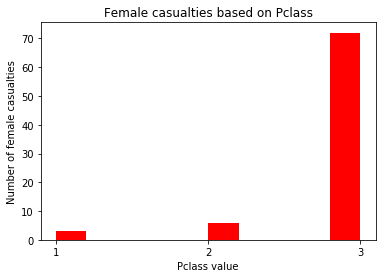

In [3]:
survival_data = df_1['Survived']
survived = (survival_data == 1).sum()
casualties = (survival_data == 0).sum()

gender_data = df_1['Sex']

male_count = (gender_data == 'male').sum()
female_count = (gender_data == 'female').sum()

male_survivors = ((gender_data == 'male') & (survival_data == 1)).sum()
female_survivors = ((gender_data == 'female') & (survival_data == 1)).sum()

male_casualties = male_count - male_survivors
female_casualties = female_count - female_survivors


def drawHistogram(data,title,xlabel,ylabel,xticks=None,yticks=None,bins=None,color=None):
    '''
    Function to produce histogram
    '''
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    if xticks != None :
        plt.xticks(xticks)
    if yticks != None :
        plt.yticks(yticks)
    plt.hist(data,bins=bins,color=color)
    plt.show()



#For females 
pclass = df_1['Pclass']

pclass_female_casualties = pclass[(survival_data == 0) & (gender_data == 'female')]
drawHistogram(pclass_female_casualties,'Female casualties based on Pclass',
              'Pclass value','Number of female casualties',xticks=range(1,4),color='Red')



In [4]:
pclass = df_1['Pclass']

pclass_values = sorted(pclass.unique())

def calculateSurvivalRate(condition=True):
    '''
    Function to calculate survival Rates
    '''
    print('----------------------------------') 
    for val in pclass_values:
        pclass_count = ((pclass == val) & (condition)).sum()
        pclass_survivors = ((pclass == val)&(survival_data == 1) & (condition)).sum()
        pclass_casualties = ((pclass == val)&(survival_data == 0) & (condition)).sum()
        print('Pclass {0} Metrics: '.format(val))
        print('Total Count : ',pclass_count)
        print('Total Number Of Survivors: ',pclass_survivors)
        print('Total Number Of casualties: ',pclass_casualties)
        print('Survival Rate: {0}%'.format(round((pclass_survivors/pclass_count)*100.0,2)))
        print('----------------------------------')

calculateSurvivalRate(gender_data == 'female')

----------------------------------
Pclass 1 Metrics: 
Total Count :  94
Total Number Of Survivors:  91
Total Number Of casualties:  3
Survival Rate: 96.81%
----------------------------------
Pclass 2 Metrics: 
Total Count :  76
Total Number Of Survivors:  70
Total Number Of casualties:  6
Survival Rate: 92.11%
----------------------------------
Pclass 3 Metrics: 
Total Count :  144
Total Number Of Survivors:  72
Total Number Of casualties:  72
Survival Rate: 50.0%
----------------------------------


## Male Casualties and P_class

> Though there were more male deaths, the upper class male passangers still had a greater chance for survival (36.89%) compared to those from the lower-class (13.7%).


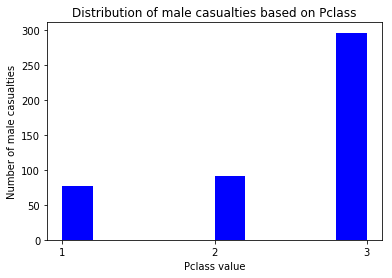

In [5]:
#For males 
pclass_male_casualties = pclass[(survival_data == 0) & (gender_data == 'male')]
drawHistogram(pclass_male_casualties,'Distribution of male casualties based on Pclass',
              'Pclass value','Number of male casualties',xticks=range(1,4),color='blue')




In [6]:
calculateSurvivalRate(gender_data == 'male')

----------------------------------
Pclass 1 Metrics: 
Total Count :  122
Total Number Of Survivors:  45
Total Number Of casualties:  77
Survival Rate: 36.89%
----------------------------------
Pclass 2 Metrics: 
Total Count :  108
Total Number Of Survivors:  17
Total Number Of casualties:  91
Survival Rate: 15.74%
----------------------------------
Pclass 3 Metrics: 
Total Count :  343
Total Number Of Survivors:  47
Total Number Of casualties:  296
Survival Rate: 13.7%
----------------------------------


## Female Casualties and Age
> The histogram shows the female casualities as it relates to age. It is clear that passangers who were 50 and older had the lowest recorded deaths. Furthmore, it is interesting to note that females in their mid 30's also had lower deaths. Not suprisingly, the most deaths came from the age group of those in their early 20's because most passangers were around this age. 

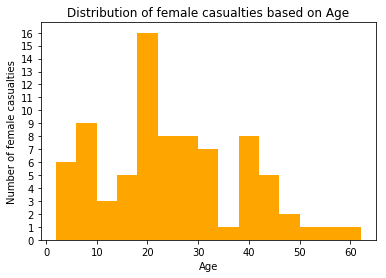

In [7]:
# code to survived an Casualties 
age_data = df_1['Age']
survived_age_data = age_data[survival_data==1].dropna()
casualties_age_data = age_data[survival_data==0].dropna()

#for female 
Age_female_casualties = age_data[(survival_data == 0) & (gender_data == 'female')]

drawHistogram(Age_female_casualties,'Distribution of female casualties based on Age',
              'Age','Number of female casualties',yticks=range(0,18,1),bins=15, color='orange')



## Male Casualties and Age 

> For males, those who were around their pre-teenage and teenage years and those older than 50 had a greater chance for survival. Again based on the age group of all 887 passangers, most of the passangers were between their late teenage years to early 30's. The most male deaths came around the late 20's range. 

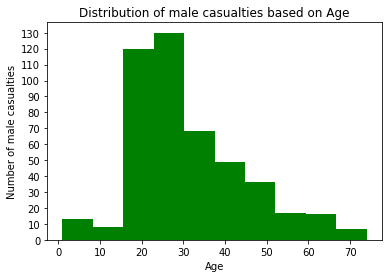

In [8]:
Age_male_casualties = age_data[(survival_data == 0) & (gender_data == 'male')]

drawHistogram(Age_male_casualties,'Distribution of male casualties based on Age',
              'Age','Number of male casualties',yticks=range(0,200,10),bins=10, color='green')


This histogram shows the ages of all passangers, the most falling around the late teenage years up to early 30's. 

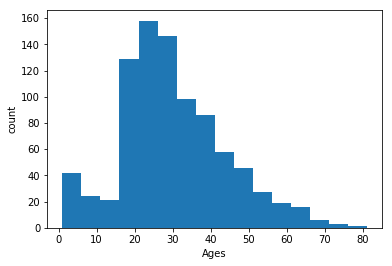

In [9]:
bin_edges = np.arange(1, df_1['Age'].max()+5, 5)
plt.hist(data = df_1, x = 'Age', bins = bin_edges)
plt.ylabel('count')
plt.xlabel('Ages')
plt.show()